# Notebook Dedicated to Compare the Reconstructed Energy with the Callibrated energy for multiple radial positions using MC Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.lines import Line2D
import seaborn as sn
import glob
import re

# Load the Data

In [3]:
# MC Main Data Directory
#mc_main_dir = 'E:/Data/solars/mc/bisMSB/'
mc_main_dir = '/home/joankl/data/solars/mc/bisMSB/'

# Observables List to load
obs_list_mc = ['energy', 'energy_corrected', 'mcke1', 'posr_av']

## Solar 8B-$\nu_e$

### Unoscillated

In [4]:
fdir = mc_main_dir + 'b8Nue/non_osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_nue = solar_dic['energy']
energy_mc_b8_nue = solar_dic['mcke1']
energy_corr_b8_nue = solar_dic['energy_corrected']
posr_b8_nue = solar_dic['posr_av']

In [5]:
energy_b8_nue.shape

(6578425,)

### Oscillated

In [5]:
fdir = mc_main_dir + 'b8Nue/osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_osc_nue = solar_dic['energy']
energy_corr_b8_osc_nue = solar_dic['energy_corrected']
posr_b8_osc_nue = solar_dic['posr_av']

In [6]:
energy_b8_osc_nue.shape

(2321345,)

## Solar 8B-$\nu_\mu$

### Unoscillated

In [7]:
fdir = mc_main_dir + 'b8Numu/non_osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_numu = solar_dic['energy']
energy_corr_b8_numu = solar_dic['energy_corrected']
posr_b8_numu = solar_dic['posr_av']

In [8]:
energy_b8_numu.shape

(4432731,)

### Oscillated

In [9]:
fdir = mc_main_dir + 'b8Numu/osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_osc_numu = solar_dic['energy']
energy_corr_b8_osc_numu = solar_dic['energy_corrected']
posr_b8_osc_numu = solar_dic['posr_av']

In [10]:
energy_b8_osc_numu.shape

(2891231,)

## Thallium-208

In [11]:
fdir = mc_main_dir + 'tl208/np_array_resume/'

tl208_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    tl208_dic[obs_i] = np.append(tl208_dic[obs_i], obs)

energy_tl208 = tl208_dic['energy']
energy_corr_tl208 = tl208_dic['energy_corrected']
posr_tl208 = tl208_dic['posr_av']

In [12]:
max(energy_tl208)

np.float64(5.7122281338204655)

In [13]:
np.linspace(0, 14, 50)

array([ 0.        ,  0.28571429,  0.57142857,  0.85714286,  1.14285714,
        1.42857143,  1.71428571,  2.        ,  2.28571429,  2.57142857,
        2.85714286,  3.14285714,  3.42857143,  3.71428571,  4.        ,
        4.28571429,  4.57142857,  4.85714286,  5.14285714,  5.42857143,
        5.71428571,  6.        ,  6.28571429,  6.57142857,  6.85714286,
        7.14285714,  7.42857143,  7.71428571,  8.        ,  8.28571429,
        8.57142857,  8.85714286,  9.14285714,  9.42857143,  9.71428571,
       10.        , 10.28571429, 10.57142857, 10.85714286, 11.14285714,
       11.42857143, 11.71428571, 12.        , 12.28571429, 12.57142857,
       12.85714286, 13.14285714, 13.42857143, 13.71428571, 14.        ])

# Plots for Various Radial Cuts

In [7]:
r_cut = [5000, 4500, 4000, 3000]  # Radial cut list to test
r_cut_colors = ['#fc0303', '#0313fc', '#b204b8', '#2eb804']

In [8]:
font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

## Solar Spectra MC

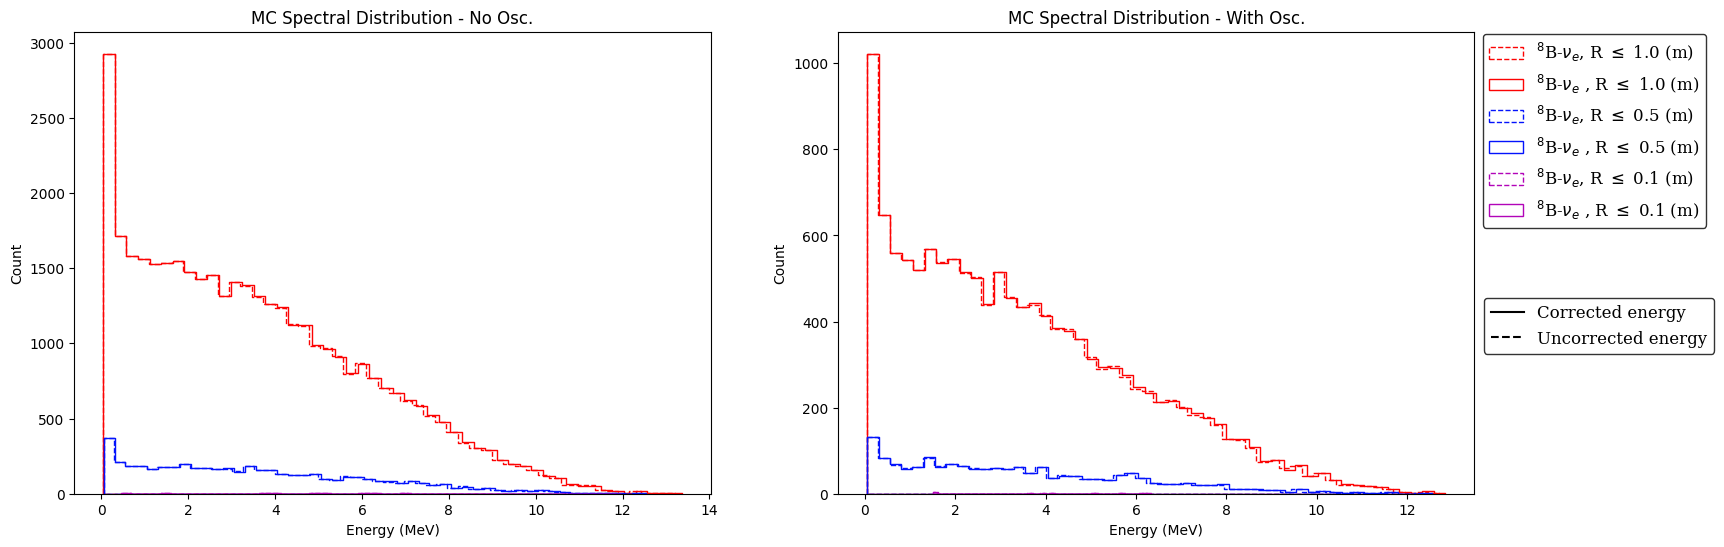

In [126]:
# ====== Plot Settings ======

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    mask_cut_b8_nue = (posr_b8_nue <= r_cut_i)
    mask_cut_b8_osc_nue = (posr_b8_osc_nue <= r_cut_i)
    
    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[mask_cut_b8_nue]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[mask_cut_b8_nue]
    
    energy_b8_osc_nue_cut = energy_b8_osc_nue[mask_cut_b8_osc_nue]
    energy_corr_b8_osc_nue_cut = energy_corr_b8_osc_nue[mask_cut_b8_osc_nue]

    # ======== PLOTS ========

    # Left plot -> without nu osc
    sn.histplot(energy_b8_nue_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')   
    sn.histplot(energy_corr_b8_nue_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
 

    #axes[0].set_yscale('log')
    #axes[0].set_xlim(5, )
    axes[0].set_xlabel('Energy (MeV)')
    #axes[0].legend(loc = 'best')
    axes[0].set_title('MC Spectral Distribution - No Osc.')

        
    # Right plot -> with nu osc
    sn.histplot(energy_b8_osc_nue_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_osc_nue_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')


    #axes[1].set_yscale('log')
    #axes[1].set_xlim(5, )
    axes[1].set_xlabel('Energy (MeV)')
    #axes[1].legend(loc = 'best')
    axes[1].set_title('MC Spectral Distribution - With Osc.')

#Common legends :
# Obtain the handles and labels of only one plot (just because they share labels!)
handles, labels = axes[0].get_legend_handles_labels()

# Create one legend out of the axis plots
fig.legend(handles, labels,
           loc = 'upper right',        
           bbox_to_anchor = (1.15, 0.89),  # coordinates of the box at the right (x, y)
           frameon = True,                 # white background
           edgecolor='black',
           prop = font_prop,
           labelcolor = font_style_axis['color'])

# Adjunts the plot size to left space to the legend box 
fig.subplots_adjust(right = 1)  # right space

# ---- Legend for line styles ----
line_style_handles = [Line2D([0], [0], color='black', linestyle='-',
           label='Corrected energy'),
           Line2D([0], [0], color='black', linestyle='--',
           label='Uncorrected energy')]

fig.legend(handles=line_style_handles,
           loc='upper right',
           bbox_to_anchor=(1.155, 0.45),
           frameon=True,
           edgecolor='black',
           prop=font_prop)

plt.show()

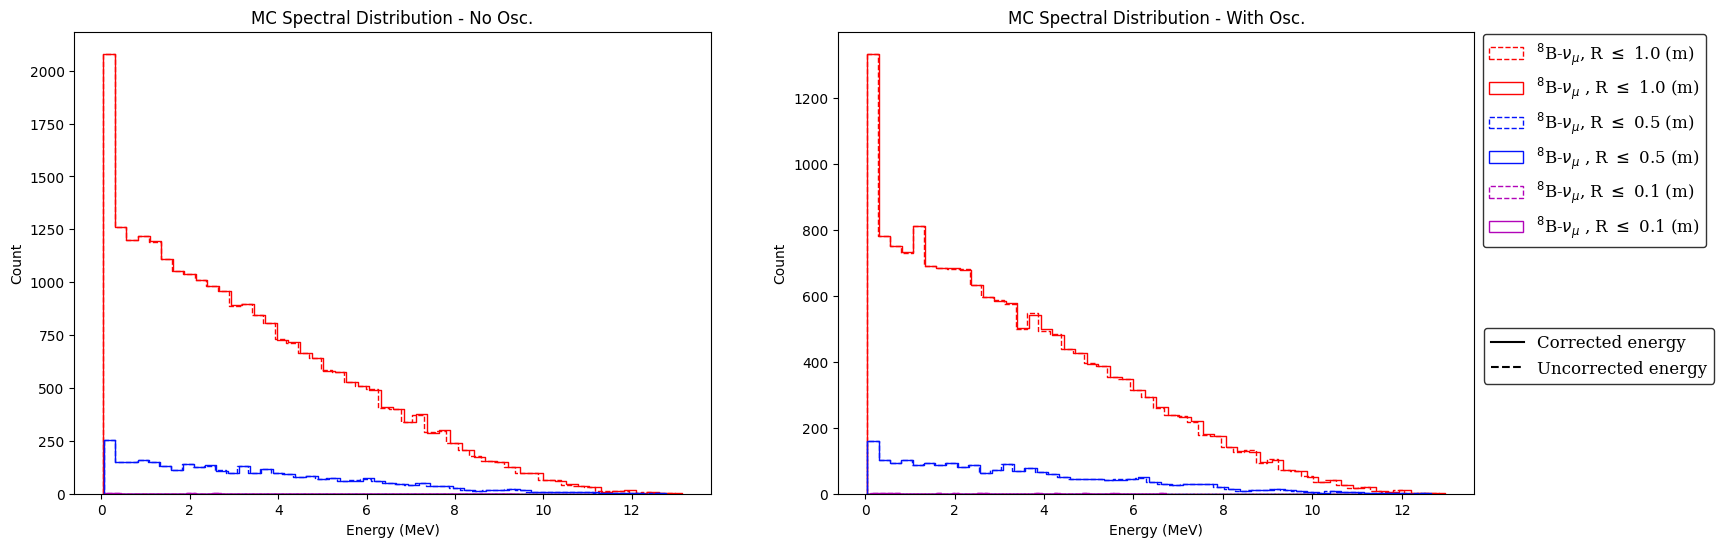

In [127]:
# ====== Plot Settings ======

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    mask_cut_b8_numu = (posr_b8_numu <= r_cut_i)
    mask_cut_b8_osc_numu = (posr_b8_osc_numu <= r_cut_i)
    
    # ---- Select the Data ----
    energy_b8_numu_cut = energy_b8_numu[mask_cut_b8_numu]
    energy_corr_b8_numu_cut = energy_corr_b8_numu[mask_cut_b8_numu]
    
    energy_b8_osc_numu_cut = energy_b8_osc_numu[mask_cut_b8_osc_numu]
    energy_corr_b8_osc_numu_cut = energy_corr_b8_osc_numu[mask_cut_b8_osc_numu]

    # ======== PLOTS ========

    # Left plot -> without nu osc
    sn.histplot(energy_b8_numu_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')   
    sn.histplot(energy_corr_b8_numu_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
 

    #axes[0].set_yscale('log')
    #axes[0].set_xlim(5, )
    axes[0].set_xlabel('Energy (MeV)')
    #axes[0].legend(loc = 'best')
    axes[0].set_title('MC Spectral Distribution - No Osc.')

        
    # Right plot -> with nu osc
    sn.histplot(energy_b8_osc_numu_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_osc_numu_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')


    #axes[1].set_yscale('log')
    #axes[1].set_xlim(5, )
    axes[1].set_xlabel('Energy (MeV)')
    #axes[1].legend(loc = 'best')
    axes[1].set_title('MC Spectral Distribution - With Osc.')

#Common legends :
# Obtain the handles and labels of only one plot (just because they share labels!)
handles, labels = axes[0].get_legend_handles_labels()

# Create one legend out of the axis plots
fig.legend(handles, labels,
           loc = 'upper right',        
           bbox_to_anchor = (1.15, 0.89),  # coordinates of the box at the right (x, y)
           frameon = True,                 # white background
           edgecolor='black',
           prop = font_prop,
           labelcolor = font_style_axis['color'])

# Adjust the plot size to left space to the legend box 
fig.subplots_adjust(right = 1)  # right space

# ---- Legend for line styles ----
line_style_handles = [Line2D([0], [0], color='black', linestyle='-',
           label='Corrected energy'),
           Line2D([0], [0], color='black', linestyle='--',
           label='Uncorrected energy')]

fig.legend(handles=line_style_handles,
           loc='upper right',
           bbox_to_anchor=(1.155, 0.40),
           frameon=True,
           edgecolor='black',
           prop=font_prop)

plt.show()

## Residuals Between Uncorrected and Corrected Energy for Osc. MC

## $\nu_e$ Residuals Using the Oscillated Spectrum

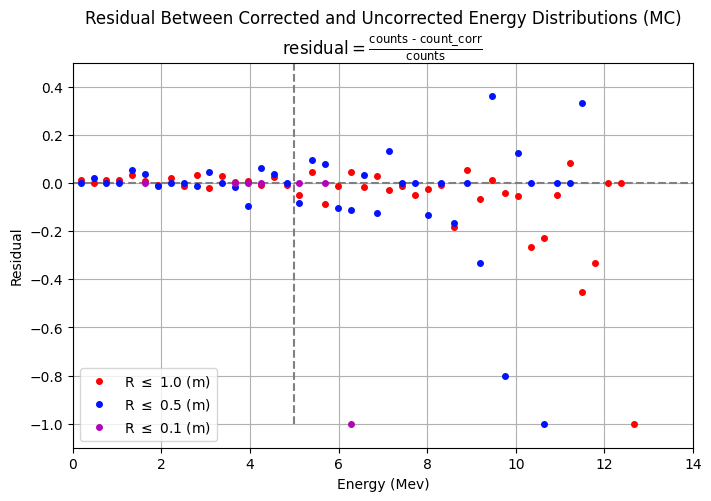

In [128]:
bins = 50

plt.figure(figsize=(8,5))

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_osc_nue <= r_cut_i) 

    # ---- Select the Data ----
    energy_b8_osc_nue_cut = energy_b8_osc_nue[posr_mask]
    energy_corr_b8_osc_nue_cut = energy_corr_b8_osc_nue[posr_mask]


    # ==== Histogram Construction ====
    # Select common energy ranges for histogram construction
    en_min = max([energy_b8_osc_nue.min(), energy_corr_b8_osc_nue.min()])
    en_max = min([energy_b8_osc_nue.max(), energy_corr_b8_osc_nue.max()])

    energy_bin_edges = np.linspace(en_min, en_max, bins + 1)
    energy_bin_center = (energy_bin_edges[:-1] + energy_bin_edges[1:])/2

    counts, _ = np.histogram(energy_b8_osc_nue_cut, bins = energy_bin_edges)
    counts_corr, _ = np.histogram(energy_corr_b8_osc_nue_cut, bins = energy_bin_edges)

    # Remove Zero Counts
    zero_mask = (counts > 0) & (counts_corr > 0)
    counts = counts[zero_mask]
    counts_corr = counts_corr[zero_mask]
    energy_bin_center = energy_bin_center[zero_mask]

    # ==== Residual Computation ====
    residual = (counts - counts_corr) / counts
    
    c1_err = np.sqrt(counts) # Error on counts point 
    c2_err = np.sqrt(counts_corr) # Error on counts points with corrections on energy

    residual_err = (1/c1_err) * np.sqrt(((counts_corr/counts)**2) * c1_err**2 +  c2_err**2)

    plt.errorbar(energy_bin_center, residual, fmt = '.',
                 color = r_cut_colors[i_dx], label = rf'R $\leq$ {r_cut_i*10**-3} (m)',
                 elinewidth = 0.8, capsize = 2, markersize = 8)

plt.plot([0, 14], [0, 0], '--', color = 'gray')
plt.plot([5, 5], [-1, 1], '--', color = 'gray')

plt.legend(loc='lower left')

plt.xlim(0, 14)
plt.ylim(-1.1, 0.5)

plt.xlabel('Energy (Mev)')
plt.ylabel('Residual')
plt.title('Residual Between Corrected and Uncorrected Energy Distributions (MC)' + '\n' + r'$\text{residual} = \frac{\text{counts - count_corr}}{\text{counts}}$')

plt.grid()
plt.show()
    

## $\nu_e$ Residuals without Oscillations

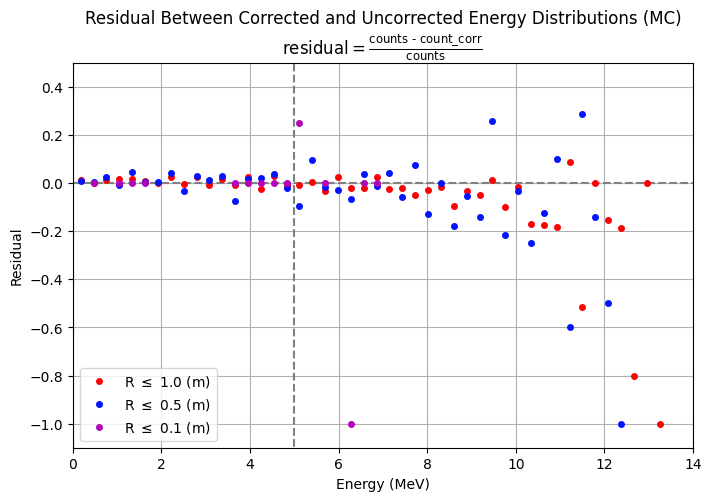

In [119]:
bins = 50

plt.figure(figsize=(8,5))

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 

    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[posr_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[posr_mask]


    # ==== Histogram Construction ====
    # Select common energy ranges for histogram construction
    en_min = max([energy_b8_nue.min(), energy_corr_b8_nue.min()])
    en_max = min([energy_b8_nue.max(), energy_corr_b8_nue.max()])

    energy_bin_edges = np.linspace(en_min, en_max, bins + 1)
    energy_bin_center = (energy_bin_edges[:-1] + energy_bin_edges[1:])/2

    counts, _ = np.histogram(energy_b8_nue_cut, bins = energy_bin_edges)
    counts_corr, _ = np.histogram(energy_corr_b8_nue_cut, bins = energy_bin_edges)

    # Remove Zero Counts
    zero_mask = (counts > 0) & (counts_corr > 0)
    counts = counts[zero_mask]
    counts_corr = counts_corr[zero_mask]
    energy_bin_center = energy_bin_center[zero_mask]

    # ==== Residual Computation ====
    residual = (counts - counts_corr) / counts
    
    c1_err = np.sqrt(counts) # Error on counts point 
    c2_err = np.sqrt(counts_corr) # Error on counts points with corrections on energy

    residual_err = (1/c1_err) * np.sqrt(((counts_corr/counts)**2) * c1_err**2 +  c2_err**2)

    plt.errorbar(energy_bin_center, residual, fmt = '.',
                 color = r_cut_colors[i_dx], label = rf'R $\leq$ {r_cut_i*10**-3} (m)',
                 elinewidth = 0.8, capsize = 2, markersize = 8)

plt.plot([0, 14], [0, 0], '--', color = 'gray')
plt.plot([5, 5], [-10, 10], '--', color = 'gray')

plt.legend(loc='lower left')

plt.xlim(0, 14)
plt.ylim(-1.1, 0.5)

plt.xlabel('Energy (MeV)')
plt.ylabel('Residual')
plt.title('Residual Between Corrected and Uncorrected Energy Distributions (MC)' + '\n' + r'$\text{residual} = \frac{\text{counts - count_corr}}{\text{counts}}$')

plt.grid()
plt.show()
    

# Diferences between the old Energy and the new Energy Corrected Values

Try to understand if the new energy corrected values are slightly corrected from the old ones or there are senseless differences.
Lest try to plot the quantitires:

(1) $\delta$ = (energy_b8_nue - energy_corr_b8_nue)/energy_b8_nue

(2) $\delta$ = (energy_b8_nue - energy_corr_b8_nue)

(3) $\delta$ = energy_corr_b8_nue/energy_b8_nue  -> Represents very well the percentage of correction of each energy!

Measure $\delta$ for low and high energies -> No big changes!

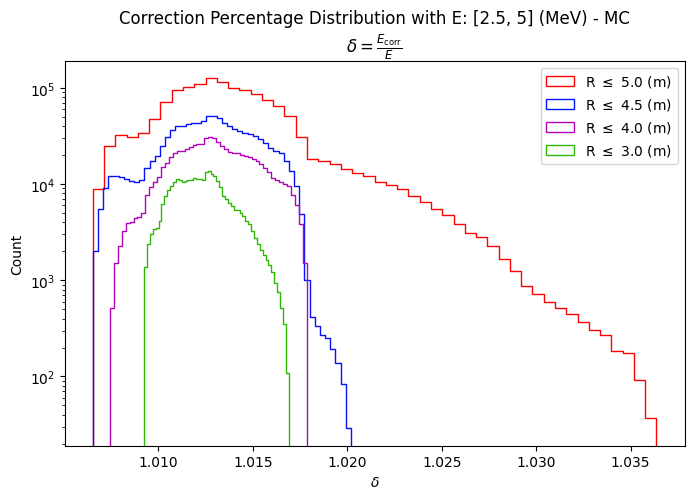

In [9]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# === Energy Cut ===
en_inf_cut = 2.5
en_sup_cut = 5

bins = 50

plt.figure(figsize=(8,5))

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 
    energy_mask = (energy_b8_nue >= en_inf_cut) & (energy_b8_nue <= en_sup_cut)

    cut_mask = posr_mask & energy_mask

    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[cut_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[cut_mask]


    # ==== Residual Computation ====
    #residual = (energy_b8_nue_cut - energy_corr_b8_nue_cut)/energy_b8_nue_cut
    #residual = (energy_b8_nue_cut - energy_corr_b8_nue_cut)
    residual = energy_corr_b8_nue_cut/energy_b8_nue_cut
    
    sn.histplot(residual, bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', label = rf'R $\leq$ {r_cut_i*10**(-3)} (m)')
    

    #plt.scatter(energy_b8_nue_cut, residual, marker = '.', color = r_cut_colors[i_dx], label = rf'R $\leq$ {r_cut_i*10**-3} (m)')

#plt.plot([0, 14], [0, 0], '--', color = 'gray')
#plt.plot([5, 5], [-10, 10], '--', color = 'gray')

plt.legend(loc='best')

#plt.xlim(0, 14)
#plt.ylim(-1.1, 0.5)

#plt.xlabel('Energy (MeV)')
plt.xlabel(r'$\delta$')
plt.title(f'Correction Percentage Distribution with E: [{en_inf_cut}, {en_sup_cut}] (MeV) - MC' + '\n' + r'$\delta = \frac{E_\text{corr}}{E}$')

plt.yscale('log')

plt.savefig(f'frac_corr_MC_E_{en_inf_cut}_{en_sup_cut}_MeV.png', format = 'png', dpi = 1000)
plt.show()

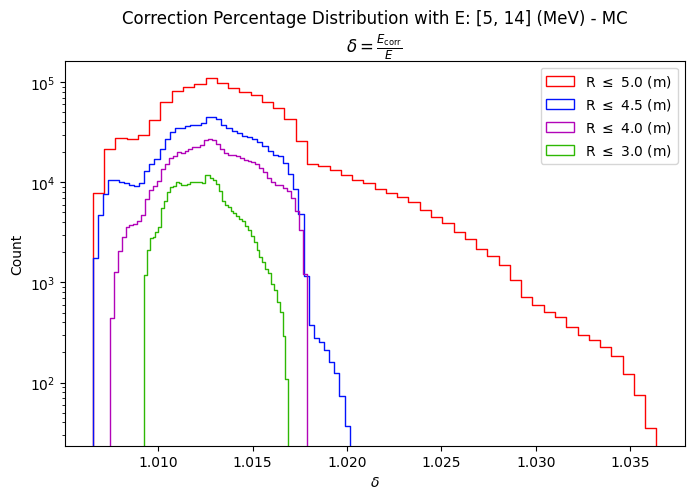

In [10]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# === Energy Cut ===
en_inf_cut = 5
en_sup_cut = 14

bins = 50

plt.figure(figsize=(8,5))

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 
    energy_mask = (energy_b8_nue >= en_inf_cut) & (energy_b8_nue <= en_sup_cut)

    cut_mask = posr_mask & energy_mask

    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[cut_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[cut_mask]


    # ==== Residual Computation ====
    #residual = (energy_b8_nue_cut - energy_corr_b8_nue_cut)/energy_b8_nue_cut
    #residual = (energy_b8_nue_cut - energy_corr_b8_nue_cut)
    residual = energy_corr_b8_nue_cut/energy_b8_nue_cut
    
    sn.histplot(residual, bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', label = rf'R $\leq$ {r_cut_i*10**(-3)} (m)')
    

    #plt.scatter(energy_b8_nue_cut, residual, marker = '.', color = r_cut_colors[i_dx], label = rf'R $\leq$ {r_cut_i*10**-3} (m)')

#plt.plot([0, 14], [0, 0], '--', color = 'gray')
#plt.plot([5, 5], [-10, 10], '--', color = 'gray')

plt.legend(loc='best')

#plt.xlim(0, 14)
#plt.ylim(-1.1, 0.5)

#plt.xlabel('Energy (MeV)')
plt.xlabel(r'$\delta$')
plt.title(f'Correction Percentage Distribution with E: [{en_inf_cut}, {en_sup_cut}] (MeV) - MC' + '\n' + r'$\delta = \frac{E_\text{corr}}{E}$')

plt.yscale('log')

plt.savefig(f'frac_corr_MC_E_{en_inf_cut}_{en_sup_cut}_MeV.png', format = 'png', dpi = 1000)
plt.show()

# Comparison with MC truth energy

Lets compute and plot the resolution quantities: 

(1) (E_truth - E_corr)/E_truth

(2) (E_truth - E)/E_truth

The finest distribution will define which energy is closer to the E_truth. Lets plot various radial positions and for low and high energy ranges

The best energy should present the shorter standard deviation on the resolution

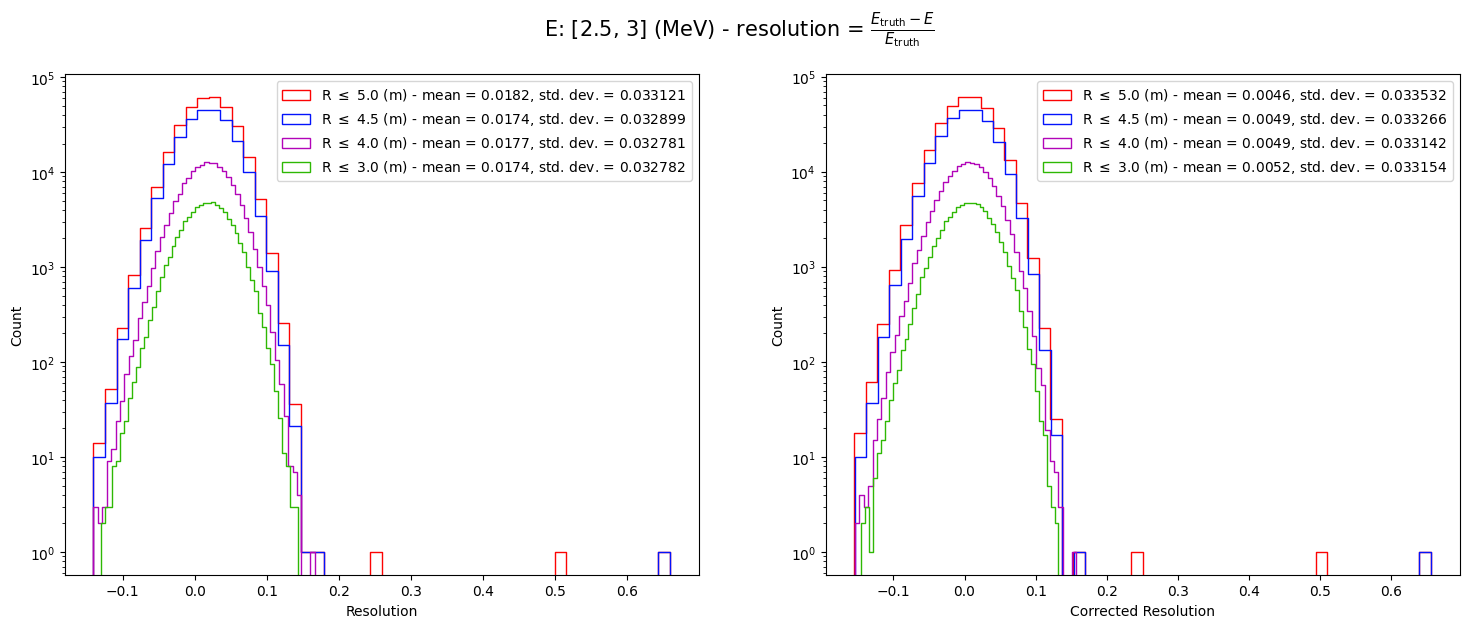

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6.5))

# === Energy Cut ===
en_inf_cut = 2.5
en_sup_cut = 3

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 
    energy_mask = (energy_b8_nue >= en_inf_cut) & (energy_b8_nue <= en_sup_cut)

    cut_mask = posr_mask & energy_mask

    # ---- Select the Data ----
    energy_mc_b8_nue_cut = energy_mc_b8_nue[cut_mask]
    energy_b8_nue_cut = energy_b8_nue[cut_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[cut_mask]


    # ==== Resolution Computation ====
    resolution = (energy_mc_b8_nue_cut - energy_b8_nue_cut)/energy_mc_b8_nue_cut
    resolution_corr = (energy_mc_b8_nue_cut - energy_corr_b8_nue_cut)/energy_mc_b8_nue_cut

    # ==== Mean and Standard Deviation ====
    mean = np.mean(resolution)
    std_dev = np.std(resolution)

    mean_corr = np.mean(resolution_corr)
    std_dev_corr = np.std(resolution_corr)

    # ==== Histogram ====
    
    sn.histplot(resolution, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean:.4f}, std. dev. = {std_dev:.6f}')
    sn.histplot(resolution_corr, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean_corr:.4f}, std. dev. = {std_dev_corr:.6f}')
    

axes[0].set_xlabel('Resolution')
axes[0].set_yscale('log')
axes[0].legend(loc = 'best')

axes[1].set_xlabel('Corrected Resolution')
axes[1].set_yscale('log')
axes[1].legend(loc = 'best')

plt.suptitle(fr'E: [{en_inf_cut}, {en_sup_cut}] (MeV) - resolution = $\frac{{E_\text{{truth}}-E}}{{E_\text{{truth}}}}$', size = 15)

plt.savefig(f'resolution_{en_inf_cut}_{en_sup_cut}_MeV.png', format = 'png', dpi = 1000)
plt.show()

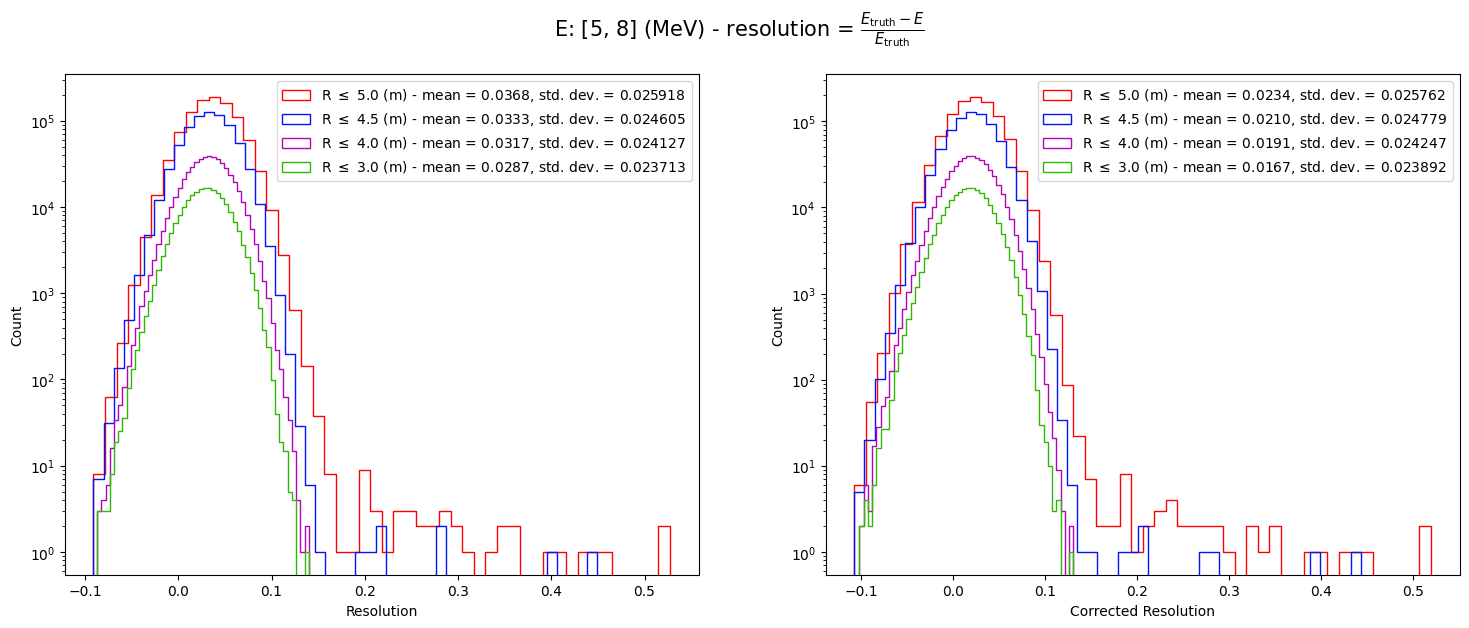

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6.5))

# === Energy Cut ===
en_inf_cut = 5
en_sup_cut = 8

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 
    energy_mask = (energy_b8_nue >= en_inf_cut) & (energy_b8_nue <= en_sup_cut)

    cut_mask = posr_mask & energy_mask

    # ---- Select the Data ----
    energy_mc_b8_nue_cut = energy_mc_b8_nue[cut_mask]
    energy_b8_nue_cut = energy_b8_nue[cut_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[cut_mask]


    # ==== Resolution Computation ====
    resolution = (energy_mc_b8_nue_cut - energy_b8_nue_cut)/energy_mc_b8_nue_cut
    resolution_corr = (energy_mc_b8_nue_cut - energy_corr_b8_nue_cut)/energy_mc_b8_nue_cut

    # ==== Mean and Standard Deviation ====
    mean = np.mean(resolution)
    std_dev = np.std(resolution)

    mean_corr = np.mean(resolution_corr)
    std_dev_corr = np.std(resolution_corr)

    # ==== Histogram ====
    
    sn.histplot(resolution, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean:.4f}, std. dev. = {std_dev:.6f}')
    sn.histplot(resolution_corr, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean_corr:.4f}, std. dev. = {std_dev_corr:.6f}')


axes[0].set_xlabel('Resolution')
axes[0].set_yscale('log')
axes[0].legend(loc = 'best')

axes[1].set_xlabel('Corrected Resolution')
axes[1].set_yscale('log')
axes[1].legend(loc = 'best')

plt.suptitle(fr'E: [{en_inf_cut}, {en_sup_cut}] (MeV) - resolution = $\frac{{E_\text{{truth}}-E}}{{E_\text{{truth}}}}$', size = 15)

plt.savefig(f'resolution_{en_inf_cut}_{en_sup_cut}_MeV.png', format = 'png', dpi = 1000)

plt.show()

In [12]:
max(energy_b8_nue)

np.float64(14.554738682459082)

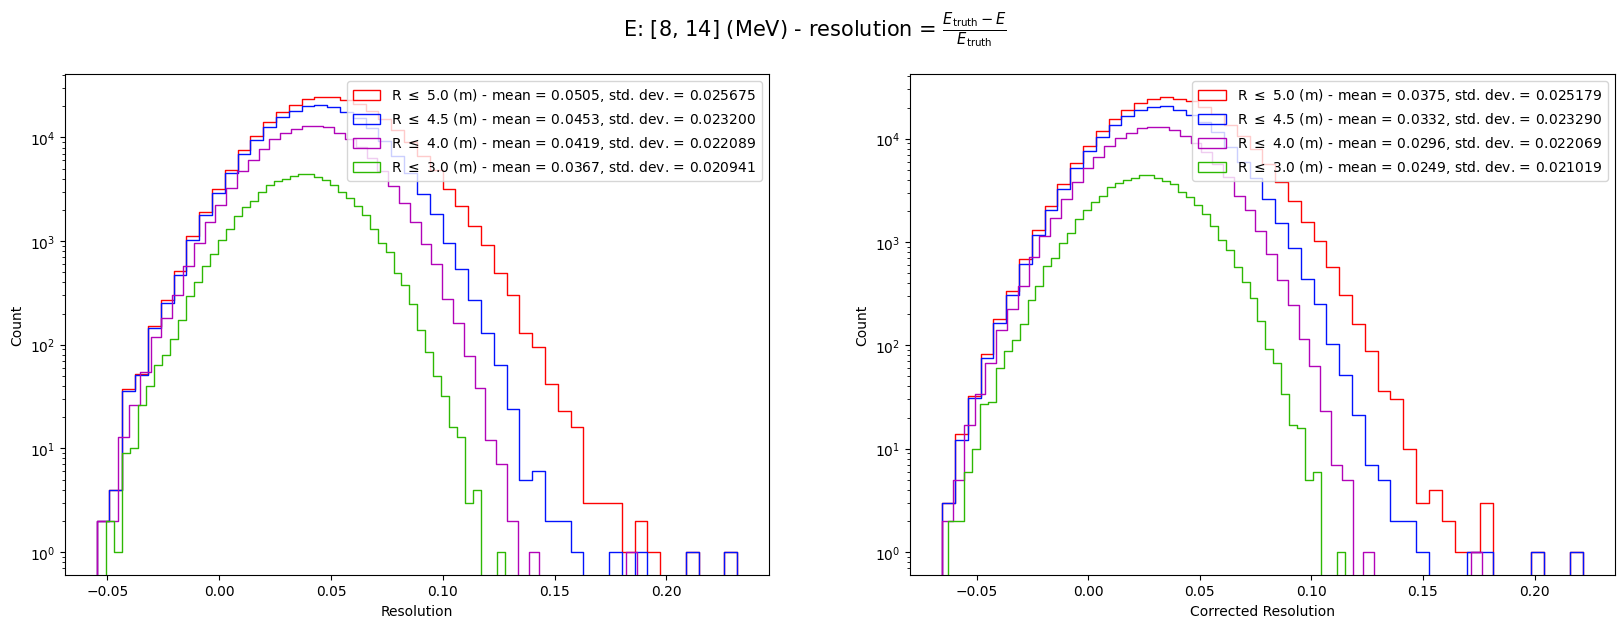

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6.5))

# === Energy Cut ===
en_inf_cut = 8
en_sup_cut = 14

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply Cuts ====
    posr_mask = (posr_b8_nue <= r_cut_i) 
    energy_mask = (energy_b8_nue >= en_inf_cut) & (energy_b8_nue <= en_sup_cut)

    cut_mask = posr_mask & energy_mask

    # ---- Select the Data ----
    energy_mc_b8_nue_cut = energy_mc_b8_nue[cut_mask]
    energy_b8_nue_cut = energy_b8_nue[cut_mask]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[cut_mask]


    # ==== Resolution Computation ====
    resolution = (energy_mc_b8_nue_cut - energy_b8_nue_cut)/energy_mc_b8_nue_cut
    resolution_corr = (energy_mc_b8_nue_cut - energy_corr_b8_nue_cut)/energy_mc_b8_nue_cut

    # ==== Mean and Standard Deviation ====
    mean = np.mean(resolution)
    std_dev = np.std(resolution)

    mean_corr = np.mean(resolution_corr)
    std_dev_corr = np.std(resolution_corr)

    # ==== Histogram ====
    
    sn.histplot(resolution, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean:.4f}, std. dev. = {std_dev:.6f}')
    sn.histplot(resolution_corr, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                label = rf'R $\leq$ {r_cut_i*10**(-3)} (m) - mean = {mean_corr:.4f}, std. dev. = {std_dev_corr:.6f}')


axes[0].set_xlabel('Resolution')
axes[0].set_yscale('log')
axes[0].legend(loc = 'upper right')

axes[1].set_xlabel('Corrected Resolution')
axes[1].set_yscale('log')
axes[1].legend(loc = 'upper right')

plt.suptitle(fr'E: [{en_inf_cut}, {en_sup_cut}] (MeV) - resolution = $\frac{{E_\text{{truth}}-E}}{{E_\text{{truth}}}}$', size = 15)

plt.savefig(f'resolution_{en_inf_cut}_{en_sup_cut}_MeV.png', format = 'png', dpi = 1000)

plt.show()

# Daniel's test
Perform some test on the energy calibration function by creating pseudo data and observe the response

In [249]:
# Definimos una función que extrae el valor entero de 'z'
def extract_z(path):
    # El patrón busca el número (incluyendo el signo negativo) entre '_z_' y '_mm'
    pattern = r'_z_(-?\d+)_mm'
    match = re.search(pattern, path)
    return int(match.group(1)) if match else 0

In [250]:
# Load Data
main_dir = '/home/joankl/data/solars/mc/bisMSB/proof/'
zscan_dir = glob.glob(main_dir + '*mm.npy') # Directory with all correcte energies for z scans
zscan_dir = sorted(zscan_dir, key=extract_z)

energy = np.load(main_dir + 'energy.npy')

## Residuals for Various z pos

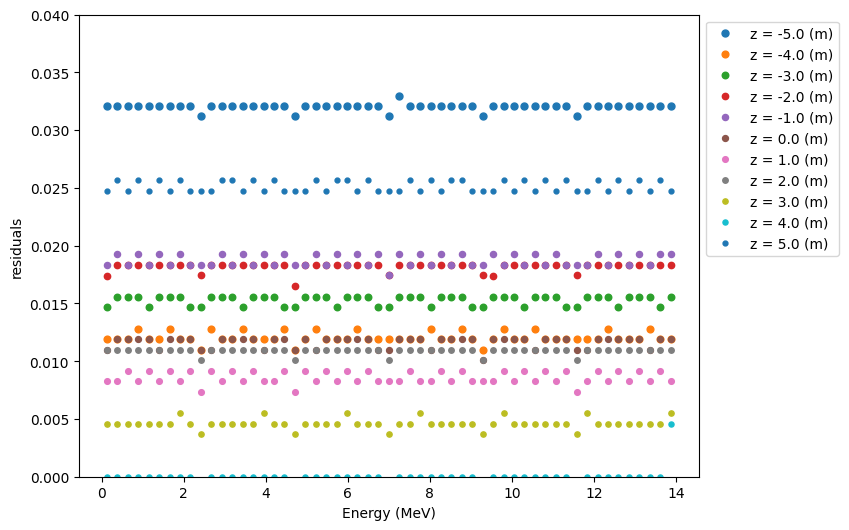

In [254]:
bins = 55
plt.figure(figsize=(8,6))

e = 0
for zscan_dir_i in zscan_dir:
    
    
    # ---- Extract the pattern that contains the z position on the zscan_dir list ----
    value = extract_z(zscan_dir_i)

    # ---- Load the energy corrected for a specific z ----     
    energy_corr_zscan_i = np.load(zscan_dir_i)

    # --- Construct the histograms ---
    energy_bin_edges = np.linspace(0, 14, bins + 1)
    energy_bin_center = (energy_bin_edges[:-1] + energy_bin_edges[1:])/2
    
    counts, _ = np.histogram(energy, bins = energy_bin_edges)
    counts_corr, _ = np.histogram(energy_corr_zscan_i, bins = energy_bin_edges)
    
    residual = (counts - counts_corr) / counts
    
    plt.errorbar(energy_bin_center, residual, fmt = '.', label = rf'z = {value * 10**-3} (m)',
                 elinewidth = 0.8, capsize = 2, markersize = 10 + e)
    e -= 0.3

plt.legend(loc = 'best', bbox_to_anchor=(1., 1.))
plt.ylim(0, 0.040)
plt.xlabel('Energy (MeV)')
plt.ylabel('residuals')

plt.show()


### 2D Plot. Z vs. Energy, where Intensity is the Residual

In [255]:
z_values.max()

np.float64(5.0)

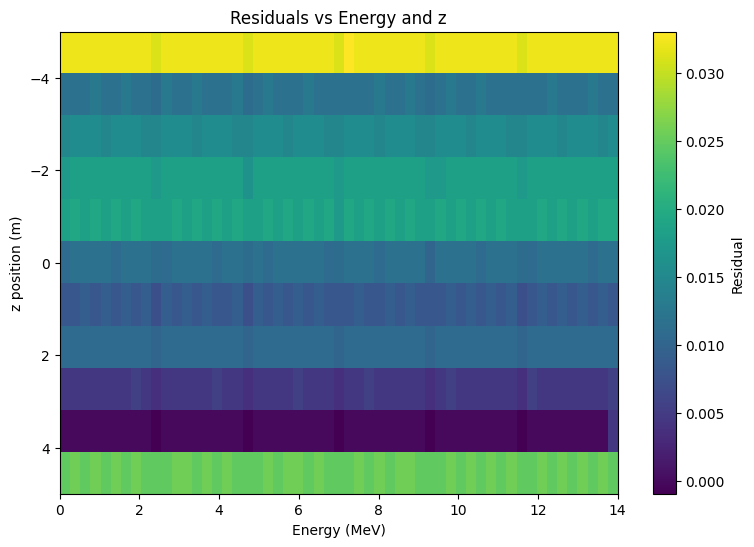

In [256]:
# Bins Preparation
bins = 55
energy_bin_edges = np.linspace(0, 14, bins + 1)
energy_bin_centers = 0.5 * (energy_bin_edges[:-1] + energy_bin_edges[1:])

# z preparation 
z_values = np.array([extract_z(f) for f in zscan_dir])
z_values = z_values * 1e-3  # transform to meters

# Residual Matrix
residual_matrix = np.zeros((len(z_values), bins))


# Fill the residual matrix:
for i_z, zscan_dir_i in enumerate(zscan_dir):

    energy_corr_zscan_i = np.load(zscan_dir_i)

    counts, _ = np.histogram(energy, bins=energy_bin_edges)
    counts_corr, _ = np.histogram(energy_corr_zscan_i, bins=energy_bin_edges)

    residual = np.divide(
        counts - counts_corr,
        counts,
        out=np.full_like(counts, np.nan, dtype=float),
        where=counts != 0
    )

    residual_matrix[i_z, :] = residual

# ==== Plot ====
plt.figure(figsize=(9, 6))
left, right, bottom, top = energy_bin_edges.min(), energy_bin_edges.max(), z_values.max(), z_values.min()

plt.imshow(residual_matrix, aspect = 'auto', extent = (left, right, bottom, top))

cbar = plt.colorbar()
cbar.set_label('Residual')

plt.xlabel('Energy (MeV)')
plt.ylabel('z position (m)')
plt.title('Residuals vs Energy and z')



plt.show()

In [257]:
! pip install --upgrade jupyterlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.0 MB/s  0:00:009.6 MB/s eta 0:00:01
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 4.5.2
    Uninstalling jupyterlab-4.5.2:
      Successfully uninstalled jupyterlab-4.5.2
